In [1]:
import pandas as pd
import requests
import re
import datetime
from datetime import timedelta
import time
import numpy as np
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
from datetime import timedelta
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Dense, Dropout
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import layers
from tensorflow.keras.layers import Dense, Dropout
import statsmodels.formula.api as smf 

In [2]:
data_df = pd.read_csv('final_df_processed_2.csv')
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
0,5963,8323008024,167000,1946.0,91767,"629 WASHINGTON AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
1,5964,8318018031,263000,1964.0,91767,"1796 MARTELLO ST, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
2,5965,8366006010,176001,1952.0,91767,"2832 SUMNER AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
3,5966,8317037029,248000,1991.0,91767,"816 AMBER OAKS CIR, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
4,5967,8323011020,184001,1948.0,91767,"631 LORANNE AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0


In [3]:
len(data_df)

692035

In [4]:
len(data_df.loc[data_df["Year"] >= 2017])

249205

In [5]:
zip_df = data_df.loc[data_df['zip_code'] == 93535]
zip_df

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
4040,10410,3126007024,140000,2007.0,93535,"43442 5TH ST E, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
4041,10411,3147014015,105001,1972.0,93535,"44633 BENALD ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
4042,10412,3170063016,214002,2010.0,93535,"43048 DARBY ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
4043,10413,3170063017,213502,2009.0,93535,"43042 DARBY ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
4044,10414,3150065046,185001,2006.0,93535,"2835 E EMERALD LN, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120529.42029,120721.175325,125930.913043,8.208905e+08,8.208905e+08,8.208905e+08,63300.0,63400.0,62900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,21860,3162010029,345003,1956.0,93535,"17110 E AVENUE K12, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.7,396951.43750,394732.929412,379704.360825,1.193411e+09,1.193411e+09,1.193411e+09,64800.0,64600.0,65000.0
15491,21861,3070006008,325003,1987.0,93535,"41028 168TH ST E, LAKE LOS ANGELES, CA 93535, USA",93534,2.22,93536,5.13,...,12.7,396951.43750,394732.929412,379704.360825,1.193411e+09,1.193411e+09,1.193411e+09,64800.0,64600.0,65000.0
15492,21862,3176031036,566005,2019.0,93535,"1748 E HOLGUIN ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.7,396951.43750,394732.929412,379704.360825,1.193411e+09,1.193411e+09,1.193411e+09,64800.0,64600.0,65000.0
15493,21863,3170040083,435004,2004.0,93535,"1034 E AVENUE K11, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.7,396951.43750,394732.929412,379704.360825,1.193411e+09,1.193411e+09,1.193411e+09,64800.0,64600.0,65000.0


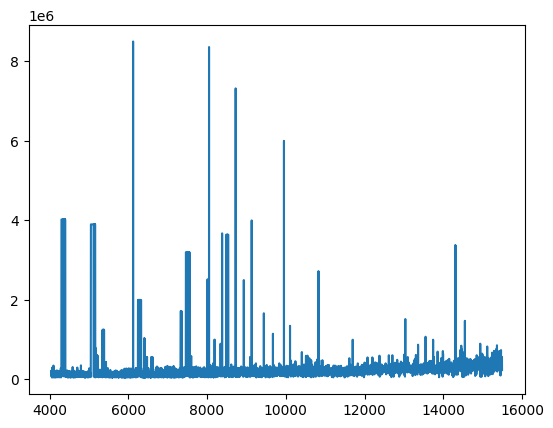

In [6]:
plt.plot(zip_df.index, zip_df['sale_price'])

In [7]:
zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


mod1 = smf.ols(f'change_sale_price ~ sale_price_Prev', data = zip_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:      change_sale_price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     943.9
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          3.06e-199
Time:                        22:46:22   Log-Likelihood:            -1.6217e+05
No. Observations:               11454   AIC:                         3.244e+05
Df Residuals:                   11452   BIC:                         3.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.044e+04   3584.721     

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_34073/2461574441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_34073/2461574441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


In [8]:
# Extract the t-statistic for sale_price_Prev
t_stat_sale_price_Prev = mod1.tvalues['sale_price_Prev']
print("T-stat for sale_price_Prev:", t_stat_sale_price_Prev)

T-stat for sale_price_Prev: -30.72217848710031


In [9]:
data_df.columns

Index(['Unnamed: 0', 'property_id', 'sale_price', 'building_year_built',
       'zip_code', 'Address_Google', 'closest_zip_1', 'distance_1',
       'closest_zip_2', 'distance_2', 'closest_zip_3', 'distance_3', 'Month',
       'Year', 'Returns', 'California AGI', 'City_Name', 'Unemployment Rate',
       'Labor Force', 'Date', 'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'Zip_month',
       'zip_1_Unemployment Rate_1', 'zip_1_Unemployment Rate_2',
       'zip_1_Unemployment Rate_3', 'zip_1_sale_price_1', 'zip_1_sale_price_2',
       'zip_1_sale_price_3', 'zip_1_California AGI_1',
       'zip_1_California AGI_2', 'zip_1_California AGI_3',
       'zip_1_Labor Force_1', 'zip_1_Labor Force_2', 'zip_1_Labor Force_3',
       'zip_2_Unemployment Rate_1', 'zip_2_Unemployment Rate_2',
       'zip_2_Unemployment Rate_3', 'zip_2_sale_price_1', 'zip_2_sale_price_2',
       'zip_2_sale_price_3', 'zip_2_California AGI_1',
       'zip_2_California AGI_2', 'zip

In [10]:
data_df['Quarter'] = data_df['Month'].apply(lambda x: 4 if x >= 9 else (3 if x >= 6 else (2 if x >= 2 else 1)))
data_df.dropna(inplace=True)
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3,Quarter
0,5963,8323008024,167000,1946.0,91767,"629 WASHINGTON AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2
1,5964,8318018031,263000,1964.0,91767,"1796 MARTELLO ST, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2
2,5965,8366006010,176001,1952.0,91767,"2832 SUMNER AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2
3,5966,8317037029,248000,1991.0,91767,"816 AMBER OAKS CIR, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2
4,5967,8323011020,184001,1948.0,91767,"631 LORANNE AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,2


In [11]:
data_df.sort_values(by='Date', inplace=True)

In [12]:
data_df.drop(columns=['Unnamed: 0', 'property_id', 'Address_Google', 'Month',
       'Year','Date'], inplace=True)

In [13]:
data_df.columns

Index(['sale_price', 'building_year_built', 'zip_code', 'closest_zip_1',
       'distance_1', 'closest_zip_2', 'distance_2', 'closest_zip_3',
       'distance_3', 'Returns', 'California AGI', 'City_Name',
       'Unemployment Rate', 'Labor Force',
       'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'Zip_month',
       'zip_1_Unemployment Rate_1', 'zip_1_Unemployment Rate_2',
       'zip_1_Unemployment Rate_3', 'zip_1_sale_price_1', 'zip_1_sale_price_2',
       'zip_1_sale_price_3', 'zip_1_California AGI_1',
       'zip_1_California AGI_2', 'zip_1_California AGI_3',
       'zip_1_Labor Force_1', 'zip_1_Labor Force_2', 'zip_1_Labor Force_3',
       'zip_2_Unemployment Rate_1', 'zip_2_Unemployment Rate_2',
       'zip_2_Unemployment Rate_3', 'zip_2_sale_price_1', 'zip_2_sale_price_2',
       'zip_2_sale_price_3', 'zip_2_California AGI_1',
       'zip_2_California AGI_2', 'zip_2_California AGI_3',
       'zip_2_Labor Force_1', 'zip_2_Labor Force_2

In [14]:
data_df = pd.get_dummies(data_df, columns=['zip_code'], drop_first=True, dtype=int)



In [15]:
data_df.drop(columns=['closest_zip_1', 'closest_zip_2', 'closest_zip_3' ,'City_Name'], inplace=True)

In [18]:
filter_var = ['building_year_built',
 'zip_1_sale_price_3',
 'property_type_SINGLE FAMILY RESIDENCE',
 'sale_price_2',
 'zip_3_sale_price_2',
 'zip_2_sale_price_1',
 'distance_3',
 'zip_3_sale_price_3',
 'zip_1_sale_price_2',
 'zip_2_sale_price_3',
 'zip_1_sale_price_1',
 'distance_2',
 'distance_1',
 'property_type_SINGLE FAMILY DWELLING',
 'Labor Force',
 'zip_code_91351',
 'zip_1_Labor Force_3',
 'Labor Force_2',
 'zip_code_91406',
 'California AGI',
 'Labor Force_1',
 'zip_code_90008',
 'zip_code_91702',
 'zip_code_90638',
 'zip_code_91335',
 'zip_3_Labor Force_3',
 'zip_code_90032',
 'Returns',
 'zip_3_California AGI_3',
 'zip_1_Labor Force_1',
 'zip_code_91301',
 'zip_code_91201',
 'zip_code_90706',
 'zip_1_Labor Force_2',
 'zip_2_Labor Force_1',
 'Labor Force_3',
 'California AGI_1',
 'zip_3_Labor Force_2',
 'zip_3_California AGI_2',
 'zip_1_California AGI_1',
 'zip_code_90806',
 'zip_code_90745',
 'Quarter',
 'zip_1_California AGI_3',
 'California AGI_2',
 'zip_code_90280',
 'zip_code_90042',
 'zip_code_90301',
 'zip_code_91325',
 'zip_code_90804',
 'zip_code_91732',
 'zip_code_91304',
 'zip_code_90302',
 'zip_code_91791',
 'zip_code_91706',
 'zip_code_92509',
 'zip_code_90640',
 'zip_code_91206',
 'zip_code_90802',
 'zip_code_91767',
 'zip_code_91776',
 'zip_code_92260',
 'zip_code_90606',
 'zip_code_90303',
 'zip_code_91765',
 'zip_code_90041',
 'zip_code_90813',
 'zip_code_90201',
 'zip_code_91750',
 'zip_code_90037',
 'zip_code_91733',
 'zip_code_92240',
 'zip_code_90805',
 'zip_code_91107',
 'zip_2_Labor Force_3',
 'zip_code_91605',
 'zip_code_90275',
 'zip_code_91723',
 'zip_code_90249',
 'zip_code_91501',
 'zip_code_91766',
 'zip_code_90033',
 'zip_code_93535',
 'zip_code_90027',
 'zip_code_90603',
 'zip_code_90065',
 'zip_code_90057',
 'zip_code_90210',
 'zip_code_91741',
 'zip_code_90732',
 'zip_code_92504',
 'zip_code_90068',
 'zip_code_91356',
 'zip_code_90036',
 'zip_code_91324',
 'zip_code_92592',
 'zip_code_91326',
 'zip_code_91436',
 'zip_code_90022',
 'zip_code_91367',
 'zip_code_91724',
 'zip_code_90502',
 'zip_code_91711',
 'zip_code_90026',
 'zip_code_92583',
 'zip_code_91401',
 'zip_code_90405',
 'zip_code_90650',
 'zip_code_90250',
 'zip_code_91506',
 'zip_code_92210',
 'zip_code_90712',
 'zip_code_90017',
 'zip_code_90018',
 'zip_code_91754',
 'zip_code_92544',
 'zip_code_91502',
 'zip_code_92591',
 'zip_code_91775',
 'zip_code_91361',
 'zip_code_90039',
 'zip_code_90247',
 'zip_code_90025',
 'zip_code_90241',
 'zip_code_90814',
 'zip_code_90807',
 'zip_code_91792',
 'zip_code_91042',
 'zip_code_91202',
 'zip_code_90048',
 'zip_code_90045',
 'zip_code_93534',
 'zip_code_91207',
 'zip_code_90815',
 'zip_code_90044',
 'zip_code_91606',
 'zip_code_90035',
 'zip_code_90716',
 'zip_code_91311',
 'zip_code_90660',
 'zip_code_91731',
 'zip_code_91387',
 'zip_code_90260',
 'zip_code_91770',
 'zip_code_90094',
 'zip_code_91790',
 'zip_code_91780',
 'zip_code_92557',
 'zip_code_91101',
 'zip_code_90211',
 'zip_code_91768',
 'zip_code_90222',
 'zip_code_90232',
 'zip_code_90043',
 'zip_code_91740',
 'zip_code_91755',
 'zip_code_90061',
 'zip_code_90703',
 'zip_code_90723',
 'zip_code_90063',
 'zip_code_90715',
 'zip_code_90255',
 'zip_code_90012',
 'zip_code_90504',
 'zip_code_91352',
 'zip_code_92543',
 'zip_code_90270',
 'zip_code_90810',
 'zip_code_91744',
 'zip_code_91303',
 'zip_code_90047',
 'zip_code_92236',
 'zip_code_90015',
 'zip_code_90305',
 'zip_code_90670',
 'zip_code_90713',
 'zip_code_90505',
 'zip_code_91803',
 'zip_code_91040',
 'zip_code_90248',
 'zip_code_91362',
 'zip_code_90746',
 'zip_code_92258',
 'zip_code_92202',
 'zip_code_92241',
 'zip_code_91709',
 'zip_code_90623',
 'zip_code_90630',
 'zip_code_90071',
 'zip_code_90401',
 'zip_code_90013',
 'zip_code_90014',
 'zip_code_90021',
 'zip_code_90058',
 'zip_code_90704',
 'zip_code_92553',
 'zip_code_91306',
 'zip_code_91773',
 'zip_code_90056',
 'zip_code_90062',
 'zip_code_92551',
 'zip_code_91746',
 'zip_code_92590',
 'zip_code_90262',
 'zip_code_90242',
 'zip_code_93550',
 'zip_code_90710',
 'zip_code_91722',
 'zip_code_90717',
 'zip_code_90016',
 'zip_code_90808',
 'zip_code_90501',
 'zip_code_90245',
 'zip_code_93536',
 'zip_code_90031',
 'zip_code_91504',
 'zip_code_90631',
 'zip_code_90278',
 'zip_code_90059',
 'zip_code_90604',
 'zip_code_90028',
 'zip_code_90220',
 'zip_code_90744',
 'zip_code_90503',
 'zip_code_91010',
 'zip_code_92506',
 'zip_code_90254',
 'zip_code_92508',
 'zip_code_91030',
 'zip_code_91106',
 'zip_code_91403',
 'zip_code_91364',
 'zip_code_90230',
 'zip_code_90023',
 'zip_code_90701',
 'zip_code_90404',
 'zip_code_91607',
 'zip_code_91505',
 'zip_code_90274',
 'zip_code_92503',
 'zip_code_91208',
 'zip_code_90304',
 'zip_code_91108',
 'zip_code_90277',
 'zip_code_90403',
 'zip_code_92501',
 'zip_code_92507',
 'zip_code_92562',
 'zip_code_90266',
 'zip_code_91411',
 'zip_code_92582',
 'zip_code_90402',
 'zip_code_92203',
 'zip_code_90038',
 'zip_code_90046',
 'zip_code_90040',
 'zip_code_92253',
 'zip_code_91316',
 'zip_code_91801',
 'zip_code_90011',
 'zip_code_90069',
 'zip_code_91103',
 'zip_code_90272',
 'zip_code_90077',
 'zip_code_90049',
 'zip_code_91602',
 'zip_code_92201',
 'zip_code_91405',
 'zip_code_90731',
 'zip_1_California AGI_2',
 'zip_code_90064',
 'zip_code_90803',
 'zip_code_91604',
 'zip_code_91007',
 'zip_code_90755',
 'zip_code_92223',
 'zip_code_91423',
 'zip_code_90240']

In [19]:

train = int(0.9 * len(data_df))

test = len(data_df) - train

X_train = data_df.head(train)[filter_var]

y_train = data_df.head(train)['sale_price']

X_test = data_df.tail(test)[filter_var]

y_test = data_df.tail(test)['sale_price']




# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier.
rf_model = RandomForestRegressor(n_estimators=500, random_state=78) 


# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

# Making predictions using the testing data.
predictions = rf_model.predict(X_test)

train_predictions = rf_model.predict(X_train)

In [20]:
from sklearn.metrics import mean_absolute_error

# Assuming test predictions are stored in 'y_pred' and actual values in 'y_test'
mae = mean_absolute_error(data_df['sale_price'].tail(test), predictions)

print(f'Mean Absolute Error (MAE): {mae}')

# Calculate residuals (actual - predicted)
residuals = data_df['sale_price'].tail(test) - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

print(f"RMSE: {rmse}")

Mean Absolute Error (MAE): 311313.0668468113
RMSE: 654645.706309913


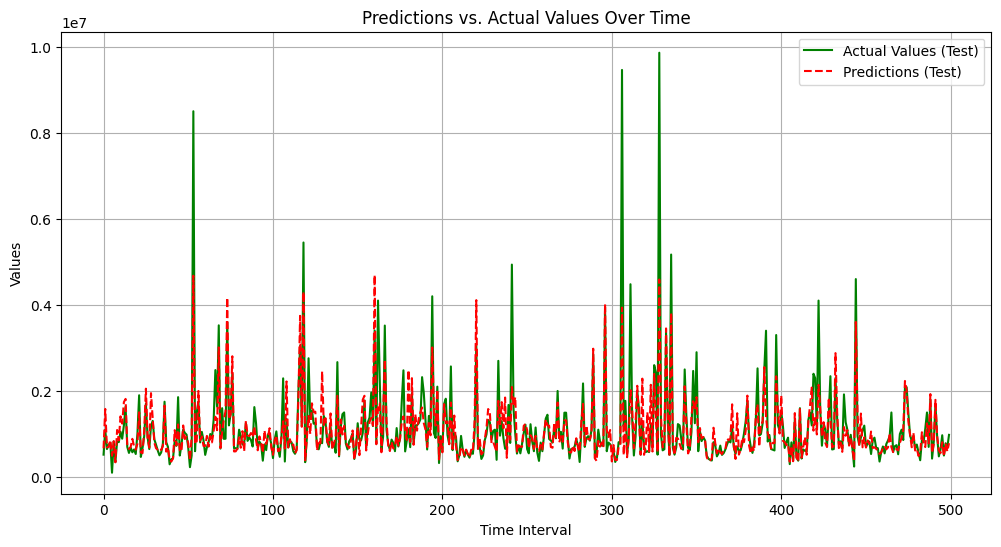

In [21]:
train_time = range(len(y_train[-500:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(500), y_test[-500:], label='Actual Values (Test)', color='green')
plt.plot(range(500), predictions[-500:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

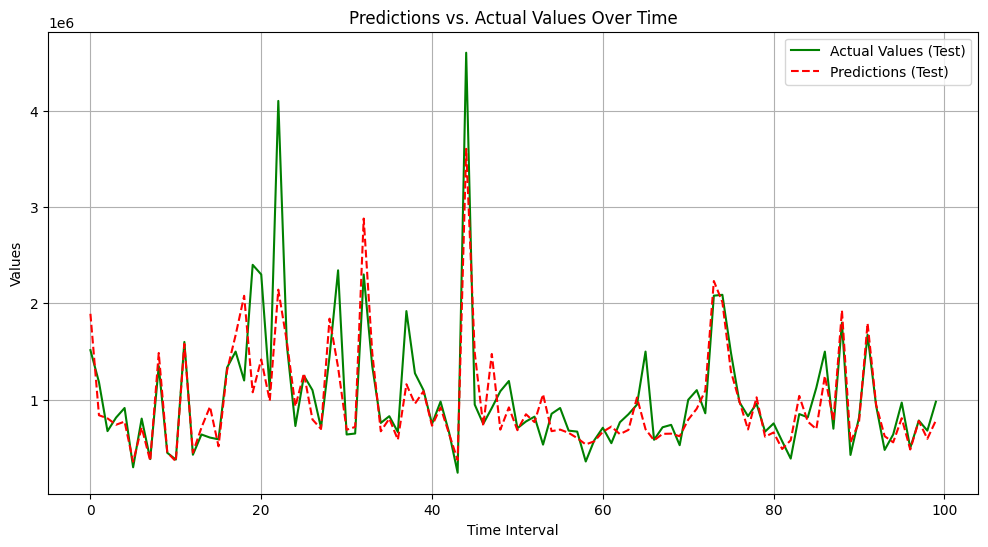

In [22]:
train_time = range(len(y_train[-100:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(100), y_test[-100:], label='Actual Values (Test)', color='green')
plt.plot(range(100), predictions[-100:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

In [20]:
# create dataframe of feature importance with most importance being at the top

feature_dict = {'Features': [], 'Importance': []}

# Print the feature importance scores
for feature, importance in zip(feature_names, importance_scores):
    
    feature_dict['Features'].append(feature)
    feature_dict['Importance'].append(importance)
    
feature_df = pd.DataFrame.from_dict(feature_dict)

feature_df = feature_df.sort_values(by='Importance', ascending=False)

feature_df

,Features,Importance
0,building_year_built,0.129457
15,zip_1_sale_price_3,0.053370
9,property_type_SINGLE FAMILY RESIDENCE,0.040816
50,sale_price_2,0.029914
38,zip_3_sale_price_2,0.028818
...,...,...
23,zip_2_Unemployment Rate_2,-0.010601
46,Unemployment Rate_1,-0.015397
51,sale_price_3,-0.016361
35,zip_3_Unemployment Rate_2,-0.018824


In [21]:
feature_list = feature_df['Features'].tolist()

# Iterate through the list of features

temp = {'Names': [], 'MSE': [], 'MAE': []}

for i in range(3, len(feature_list)):
    # train with new features
    
    X_train_test = X_train[feature_list]
            
    X_test_test = X_test[feature_list]


    model = RandomForestRegressor(max_features=None, n_estimators = 500, random_state=78)

    model.fit(X_train_test, y_train)

    predict = model.predict(X_test_test)


    # Get the adjusted R-squared value
    mse = np.mean((y_test - predict) ** 2)
    
    mae = mean_absolute_error(y_test, predict)
    
    # append results to dict

    temp['Names'].append(feature_list)

    temp['MSE'].append(mse)
    
    temp['MAE'].append(mae)
    
    feature_list = feature_list[:-1]

In [22]:
temp_df = pd.DataFrame.from_dict(temp)
temp_df

,Names,MSE,MAE
0,"[building_year_built, zip_1_sale_price_3, prop...",5.256771e+11,363970.765716
1,"[building_year_built, zip_1_sale_price_3, prop...",5.153170e+11,359498.797643
2,"[building_year_built, zip_1_sale_price_3, prop...",5.043357e+11,357802.584498
3,"[building_year_built, zip_1_sale_price_3, prop...",5.216188e+11,366700.292045
4,"[building_year_built, zip_1_sale_price_3, prop...",5.129281e+11,364023.134726
...,...,...,...
302,"[building_year_built, zip_1_sale_price_3, prop...",4.335080e+11,314290.571897
303,"[building_year_built, zip_1_sale_price_3, prop...",4.370021e+11,315621.411155
304,"[building_year_built, zip_1_sale_price_3, prop...",4.500049e+11,337268.686708
305,"[building_year_built, zip_1_sale_price_3, prop...",4.619651e+11,340446.555090


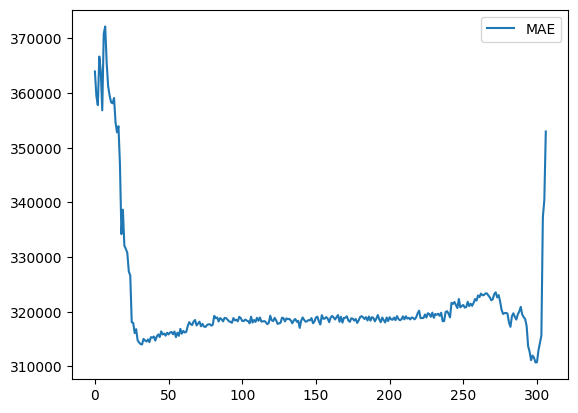

In [23]:
temp_df.plot(y='MAE')
plt.show()

In [24]:
# Get the index of the row where column 'B' has the minimum value
row_idx = temp_df['MAE'].idxmin()

# Get the row itself
row = temp_df.loc[row_idx]
var = row['Names']

In [27]:
temp_df.sort_values(by='MAE', inplace=True)

In [28]:
temp_df

,Names,MSE,MAE
299,"[building_year_built, zip_1_sale_price_3, prop...",4.227861e+11,310705.335093
300,"[building_year_built, zip_1_sale_price_3, prop...",4.243109e+11,310755.574733
296,"[building_year_built, zip_1_sale_price_3, prop...",4.265808e+11,311130.305680
298,"[building_year_built, zip_1_sale_price_3, prop...",4.255612e+11,311567.352250
297,"[building_year_built, zip_1_sale_price_3, prop...",4.268621e+11,311972.270935
...,...,...,...
4,"[building_year_built, zip_1_sale_price_3, prop...",5.129281e+11,364023.134726
8,"[building_year_built, zip_1_sale_price_3, prop...",5.115478e+11,365515.883129
3,"[building_year_built, zip_1_sale_price_3, prop...",5.216188e+11,366700.292045
6,"[building_year_built, zip_1_sale_price_3, prop...",5.184869e+11,370835.629134


In [38]:
temp_df.loc[temp_df['MAE'] > 313000].head(10)

,Names,MSE,MAE
294,"[building_year_built, zip_1_sale_price_3, prop...",4.266962e+11,313698.377689
32,"[building_year_built, zip_1_sale_price_3, prop...",4.308011e+11,314002.863525
31,"[building_year_built, zip_1_sale_price_3, prop...",4.314471e+11,314083.122641
302,"[building_year_built, zip_1_sale_price_3, prop...",4.335080e+11,314290.571897
30,"[building_year_built, zip_1_sale_price_3, prop...",4.314085e+11,314344.569359
37,"[building_year_built, zip_1_sale_price_3, prop...",4.319338e+11,314434.149997
35,"[building_year_built, zip_1_sale_price_3, prop...",4.314475e+11,314546.399854
41,"[building_year_built, zip_1_sale_price_3, prop...",4.315440e+11,314709.366257
34,"[building_year_built, zip_1_sale_price_3, prop...",4.319050e+11,314729.459745
29,"[building_year_built, zip_1_sale_price_3, prop...",4.323098e+11,314772.506732


In [33]:
temp_df.head(10)

,Names,MSE,MAE
299,"[building_year_built, zip_1_sale_price_3, prop...",4.227861e+11,310705.335093
300,"[building_year_built, zip_1_sale_price_3, prop...",4.243109e+11,310755.574733
296,"[building_year_built, zip_1_sale_price_3, prop...",4.265808e+11,311130.305680
298,"[building_year_built, zip_1_sale_price_3, prop...",4.255612e+11,311567.352250
297,"[building_year_built, zip_1_sale_price_3, prop...",4.268621e+11,311972.270935
295,"[building_year_built, zip_1_sale_price_3, prop...",4.255824e+11,312687.741339
301,"[building_year_built, zip_1_sale_price_3, prop...",4.306974e+11,312890.219092
294,"[building_year_built, zip_1_sale_price_3, prop...",4.266962e+11,313698.377689
32,"[building_year_built, zip_1_sale_price_3, prop...",4.308011e+11,314002.863525
31,"[building_year_built, zip_1_sale_price_3, prop...",4.314471e+11,314083.122641


In [29]:
temp_df.head(1)['Names'].tolist()

[['building_year_built',
  'zip_1_sale_price_3',
  'property_type_SINGLE FAMILY RESIDENCE',
  'sale_price_2',
  'zip_3_sale_price_2',
  'zip_2_sale_price_1',
  'distance_3',
  'zip_3_sale_price_3',
  'zip_1_sale_price_2',
  'zip_2_sale_price_3',
  'zip_1_sale_price_1']]

In [31]:
temp_df.head(2)['Names'].tolist()[1]

['building_year_built',
 'zip_1_sale_price_3',
 'property_type_SINGLE FAMILY RESIDENCE',
 'sale_price_2',
 'zip_3_sale_price_2',
 'zip_2_sale_price_1',
 'distance_3',
 'zip_3_sale_price_3',
 'zip_1_sale_price_2',
 'zip_2_sale_price_3']

In [32]:
temp_df.head(3)['Names'].tolist()[2]

['building_year_built',
 'zip_1_sale_price_3',
 'property_type_SINGLE FAMILY RESIDENCE',
 'sale_price_2',
 'zip_3_sale_price_2',
 'zip_2_sale_price_1',
 'distance_3',
 'zip_3_sale_price_3',
 'zip_1_sale_price_2',
 'zip_2_sale_price_3',
 'zip_1_sale_price_1',
 'distance_2',
 'distance_1',
 'property_type_SINGLE FAMILY DWELLING']

In [35]:
temp_df.head(4)['Names'].tolist()[3]

['building_year_built',
 'zip_1_sale_price_3',
 'property_type_SINGLE FAMILY RESIDENCE',
 'sale_price_2',
 'zip_3_sale_price_2',
 'zip_2_sale_price_1',
 'distance_3',
 'zip_3_sale_price_3',
 'zip_1_sale_price_2',
 'zip_2_sale_price_3',
 'zip_1_sale_price_1',
 'distance_2']

In [36]:
temp_df.head(5)['Names'].tolist()[4]

['building_year_built',
 'zip_1_sale_price_3',
 'property_type_SINGLE FAMILY RESIDENCE',
 'sale_price_2',
 'zip_3_sale_price_2',
 'zip_2_sale_price_1',
 'distance_3',
 'zip_3_sale_price_3',
 'zip_1_sale_price_2',
 'zip_2_sale_price_3',
 'zip_1_sale_price_1',
 'distance_2',
 'distance_1']

In [42]:
plot_df = temp_df.sort_index()

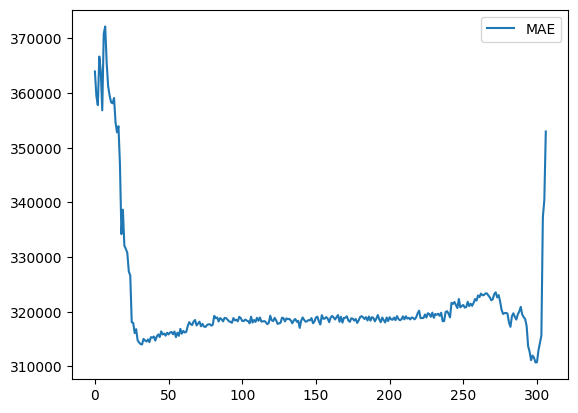

In [43]:
plot_df.plot(y='MAE')
plt.show()

In [47]:
plot_df.head(50).sort_values(by='MAE').head(1)['Names'].tolist()[0]

['building_year_built',
 'zip_1_sale_price_3',
 'property_type_SINGLE FAMILY RESIDENCE',
 'sale_price_2',
 'zip_3_sale_price_2',
 'zip_2_sale_price_1',
 'distance_3',
 'zip_3_sale_price_3',
 'zip_1_sale_price_2',
 'zip_2_sale_price_3',
 'zip_1_sale_price_1',
 'distance_2',
 'distance_1',
 'property_type_SINGLE FAMILY DWELLING',
 'Labor Force',
 'zip_code_91351',
 'zip_1_Labor Force_3',
 'Labor Force_2',
 'zip_code_91406',
 'California AGI',
 'Labor Force_1',
 'zip_code_90008',
 'zip_code_91702',
 'zip_code_90638',
 'zip_code_91335',
 'zip_3_Labor Force_3',
 'zip_code_90032',
 'Returns',
 'zip_3_California AGI_3',
 'zip_1_Labor Force_1',
 'zip_code_91301',
 'zip_code_91201',
 'zip_code_90706',
 'zip_1_Labor Force_2',
 'zip_2_Labor Force_1',
 'Labor Force_3',
 'California AGI_1',
 'zip_3_Labor Force_2',
 'zip_3_California AGI_2',
 'zip_1_California AGI_1',
 'zip_code_90806',
 'zip_code_90745',
 'Quarter',
 'zip_1_California AGI_3',
 'California AGI_2',
 'zip_code_90280',
 'zip_code_90042